In [1]:
import sys
sys.path.append('../2_analyse/')

In [2]:
import pandas as pd
import json
import seaborn
from matplotlib.pyplot import figure

import plotly.express as px
import plotly.graph_objects as go

seaborn.set()

In [3]:
pd.set_option('display.max_columns', None)

### Etude insee à comparer

https://www.insee.fr/fr/statistiques/5424748

https://www.insee.fr/fr/statistiques/5016913

In [4]:
SIREN = pd.read_csv('../0_data/base_sirene/StockUniteLegale_utf8.csv', 
                    usecols=['siren', 'activitePrincipaleUniteLegale', 'denominationUniteLegale','etatAdministratifUniteLegale',
                             'unitePurgeeUniteLegale', 'caractereEmployeurUniteLegale', 'statutDiffusionUniteLegale',
                             'trancheEffectifsUniteLegale', 'prenom1UniteLegale', 'nomenclatureActivitePrincipaleUniteLegale',
                             'dateCreationUniteLegale', 'categorieEntreprise'],
                    dtype = {'siren': str, 'trancheEffectifsUniteLegale': str})

C:\Users\RémiJAYLET\AppData\Local\Temp\ipykernel_10160\2268468196.py:1: DtypeWarning: Columns (2,6,17) have mixed types. Specify dtype option on import or set low_memory=False.
  SIREN = pd.read_csv('../0_data/base_sirene/StockUniteLegale_utf8.csv',


### Répartition de différents agrégats selon la catégorie d'entreprises

In [5]:
SIREN = SIREN[SIREN.unitePurgeeUniteLegale.isna()]
SIREN = SIREN[SIREN.etatAdministratifUniteLegale == 'A']
SIREN = SIREN[SIREN.statutDiffusionUniteLegale == 'O']
SIREN = SIREN[SIREN.prenom1UniteLegale.isna()]
SIREN['categorie'] = SIREN['activitePrincipaleUniteLegale'].apply(lambda x: x.split('.')[0])

Une grande entreprise (GE) est une entreprise qui vérifie au moins une des deux conditions suivantes : avoir au moins 5 000 salariés et avoir plus de 1,5 milliard d'euros de chiffre d'affaires et plus de 2 milliards d'euros de total de bilan.

Une entreprise de taille intermédiaire (ETI) est une entreprise qui a entre 250 et 4 999 salariés, et soit un chiffre d'affaires n'excédant pas 1,5 milliard d'euros soit un total de bilan n'excédant pas 2 milliards d'euros.

Les petites et moyennes entreprises (PME) sont celles qui occupent moins de 250 personnes, et qui ont un chiffre d'affaires annuel n'excédant pas 50 millions d'euros ou un total de bilan n'excédant pas 43 millions d'euros. Elles incluent la catégorie des microentreprises.

Une microentreprise est une entreprise occupant moins de 10 personnes, et qui a un chiffre d'affaires annuel ou un total de bilan n'excédant pas 2 millions d'euros. Les microentreprises font partie des petites et moyennes entreprises (PME).


On a pas accès aux données fin. , on définit donc uniquement via effectifs :
- GE : 5000+ -> trancheEffetif = ['52', '53'] 
- ETI : 250 - 4999 -> trancheEffetif = ['32', '41', '42', '51'] 
- PME : 10 - 249 -> trancheEffetif = ['11', 12', '21', '22', '31'] 
- MIC : -10 -> trancheEffetif = ['NN', '00', '01', '02', '03'] 

In [74]:
SIREN_effectif = SIREN.copy()
SIREN_effectif.loc[SIREN_effectif['trancheEffectifsUniteLegale'].isnull(),'trancheEffectifsUniteLegale'] = "Non renseigné"

In [7]:
SIREN.loc[SIREN['trancheEffectifsUniteLegale'].isnull()]

,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,prenom1UniteLegale,trancheEffectifsUniteLegale,categorieEntreprise,etatAdministratifUniteLegale,denominationUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,caractereEmployeurUniteLegale,categorie
51,005420260,O,NaN,1954-12-25,NaN,NaN,NaN,A,SOCIETE ANONYME MILBLED,20.01,NAP,N,20
171,005480082,O,NaN,1954-01-01,NaN,NaN,NaN,A,SOCIETE BRETONNE DE TRAVAUX PUBLICS,45.1A,NAF1993,N,45
173,005480231,O,NaN,1954-12-25,NaN,NaN,NaN,A,QUINCAILLERIE FRANCOIS,64.22,NAP,N,64
231,005520416,O,NaN,1955-12-25,NaN,NaN,NaN,A,ETABLISSEMENTS BOZZI,37.1Z,NAF1993,N,37
234,005520440,O,NaN,1955-01-01,NaN,NaN,NaN,A,MONCHAUX WINDERS,18.2D,NAF1993,N,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25543840,998803910,O,NaN,1976-12-25,NaN,NaN,NaN,A,ARMORICAINE DE MER ET DE LOISIRS,52.4C,NAF1993,N,52
25543863,998863906,O,NaN,1994-06-30,NaN,NaN,NaN,A,SOC INTERESSEMENT COMMERCE FINANCIER,65.2E,NAF1993,N,65
25543879,998902605,O,NaN,1976-01-01,NaN,NaN,NaN,A,MARCHE DU MEUBLE D'OCCASION,52.5Z,NAF1993,N,52
25543883,998912802,O,NaN,1976-12-25,NaN,NaN,NaN,A,CENTRE COMMERCIAL DE BRIEY-LA KAUKENNE,77.01,NAP,N,77


In [8]:
SIREN.loc[SIREN['trancheEffectifsUniteLegale'].isna()]

,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,prenom1UniteLegale,trancheEffectifsUniteLegale,categorieEntreprise,etatAdministratifUniteLegale,denominationUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,caractereEmployeurUniteLegale,categorie
51,005420260,O,NaN,1954-12-25,NaN,NaN,NaN,A,SOCIETE ANONYME MILBLED,20.01,NAP,N,20
171,005480082,O,NaN,1954-01-01,NaN,NaN,NaN,A,SOCIETE BRETONNE DE TRAVAUX PUBLICS,45.1A,NAF1993,N,45
173,005480231,O,NaN,1954-12-25,NaN,NaN,NaN,A,QUINCAILLERIE FRANCOIS,64.22,NAP,N,64
231,005520416,O,NaN,1955-12-25,NaN,NaN,NaN,A,ETABLISSEMENTS BOZZI,37.1Z,NAF1993,N,37
234,005520440,O,NaN,1955-01-01,NaN,NaN,NaN,A,MONCHAUX WINDERS,18.2D,NAF1993,N,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25543840,998803910,O,NaN,1976-12-25,NaN,NaN,NaN,A,ARMORICAINE DE MER ET DE LOISIRS,52.4C,NAF1993,N,52
25543863,998863906,O,NaN,1994-06-30,NaN,NaN,NaN,A,SOC INTERESSEMENT COMMERCE FINANCIER,65.2E,NAF1993,N,65
25543879,998902605,O,NaN,1976-01-01,NaN,NaN,NaN,A,MARCHE DU MEUBLE D'OCCASION,52.5Z,NAF1993,N,52
25543883,998912802,O,NaN,1976-12-25,NaN,NaN,NaN,A,CENTRE COMMERCIAL DE BRIEY-LA KAUKENNE,77.01,NAP,N,77


In [88]:
correspondances = {
    'GE': ['52', '53'],
    'ETI': ['32', '41', '42', '51'],
    'PME': ['11', '12', '21', '22', '31'],
    'MIC': ['NN', '00', '01', '02', '03'],
}

def map_categories(sous_categorie):
    for categorie, sous_categories in correspondances.items():
        if sous_categorie in sous_categories:
            return categorie
    return 'MIC'

SIREN_effectif['categorie_entreprise'] = SIREN_effectif['trancheEffectifsUniteLegale'].apply(map_categories)

SIREN_effectif

,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,prenom1UniteLegale,trancheEffectifsUniteLegale,categorieEntreprise,etatAdministratifUniteLegale,denominationUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,caractereEmployeurUniteLegale,categorie,categorie_entreprise
38,005420021,O,NaN,1954-01-01,NaN,NN,PME,A,ETABLISSEMENTS LUCIEN BIQUEZ,46.69B,NAFRev2,O,46,MIC
45,005420120,O,NaN,1954-01-01,NaN,11,PME,A,SOCIETE DES SUCRERIES DU MARQUENTERRE,70.10Z,NAFRev2,O,70,PME
51,005420260,O,NaN,1954-12-25,NaN,Non renseigné,NaN,A,SOCIETE ANONYME MILBLED,20.01,NAP,N,20,MIC
101,005450093,O,NaN,1954-01-01,NaN,NN,PME,A,BASALPINE AUTOCARS,47.78C,NAFRev2,O,47,MIC
171,005480082,O,NaN,1954-01-01,NaN,Non renseigné,NaN,A,SOCIETE BRETONNE DE TRAVAUX PUBLICS,45.1A,NAF1993,N,45,MIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25543908,999990401,O,NaN,1981-06-01,NaN,03,PME,A,PROCONECT,27.33Z,NAFRev2,O,27,MIC
25543910,999990443,O,NaN,1982-04-01,NaN,NN,PME,A,DRCM-DRESDNER RCM GESTION,68.20B,NAFRev2,N,68,MIC
25543912,999990526,O,NaN,1983-01-01,NaN,NN,PME,A,TEXAS GULF EXPORT CORPORATION,73.20Z,NAFRev2,N,73,MIC
25543919,999990666,O,NaN,1986-05-15,NaN,NN,GE,A,ASSU VIE,65.11Z,NAFRev2,N,65,MIC


In [9]:
SIREN.trancheEffectifsUniteLegale.value_counts(dropna=False)

trancheEffectifsUniteLegale
NaN    4529459
NN     2406769
01      628833
02      329769
03      177166
11      137578
00      129452
12       84760
21       31114
22       14736
32        5701
31        2871
41        2819
42        1403
51         783
52         169
53          84
Name: count, dtype: int64

In [13]:
100 * SIREN.categorieEntreprise.value_counts(dropna=False) / len(SIREN)

categorieEntreprise
NaN    58.855402
PME    39.833424
ETI     0.897982
GE      0.413192
Name: count, dtype: float64

In [90]:
val_1 = (round(100*(SIREN['categorieEntreprise'].value_counts(dropna=False) / len(SIREN)), 2)).to_dict()

In [91]:
val_1

{nan: 58.86, 'PME': 39.83, 'ETI': 0.9, 'GE': 0.41}

In [92]:
val_2 = (round(100*(SIREN_effectif['categorieEntreprise'].value_counts(dropna=False) / len(SIREN_effectif)), 2)).to_dict()

In [93]:
val_2

{nan: 58.86, 'PME': 39.83, 'ETI': 0.9, 'GE': 0.41}

In [94]:
val_3 = (round(100*(SIREN_effectif['categorie_entreprise'].value_counts(dropna=False) / len(SIREN_effectif)), 2)).to_dict()

In [95]:
val_3

{'MIC': 96.68, 'PME': 3.2, 'ETI': 0.13, 'GE': 0.0}

In [96]:
val_insee = {'MIC': 96.4, 'PME': 3.5, 'ETI': 0.01, 'GE': 0.01}

In [97]:
comp = pd.DataFrame([val_1, val_2, val_3, val_insee], columns = ['GE', 'PME', 'ETI', 'MIC'])

In [98]:
comp

,GE,PME,ETI,MIC
0,0.41,39.83,0.90,NaN
1,0.41,39.83,0.90,NaN
2,0.00,3.20,0.13,96.68
3,0.01,3.50,0.01,96.40


### Nombre de créations d'entreprises depuis 2010

In [99]:
SIREN['dateCreationUniteLegale'] = pd.to_datetime(SIREN['dateCreationUniteLegale'], format='mixed', dayfirst=True,
                                                 errors='coerce')

In [100]:
SIREN.loc[SIREN['siren'] == '951542190', 'dateCreationUniteLegale'] = pd.to_datetime('2023-03-30')

In [101]:
len(SIREN[SIREN.dateCreationUniteLegale == '1900-01-01'])

109044

In [102]:
SIREN['year'] = SIREN['dateCreationUniteLegale'].dt.year.astype(int)

<Axes: xlabel='year'>

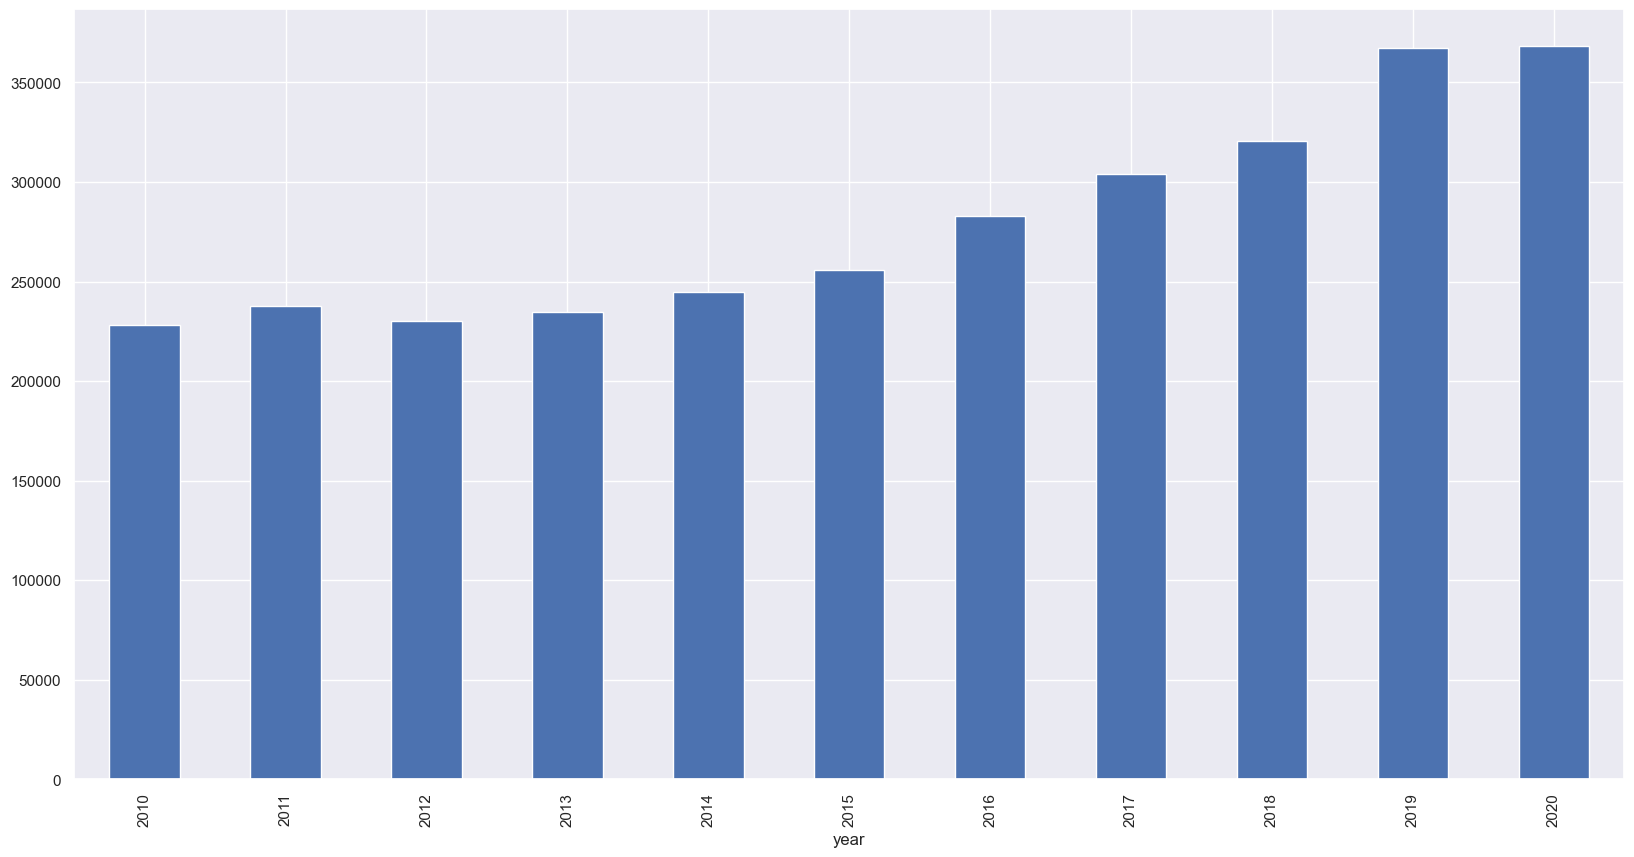

In [105]:
figure(figsize=(20, 10))

SIREN[(SIREN.year >= 2010) & (SIREN.year <= 2020)].groupby('year').count()['siren'].plot(kind='bar')

In [106]:
SIREN[(SIREN.year >= 2010) & (SIREN.year <= 2020)].groupby('year').count()['siren']

year
2010    228275
2011    237832
2012    230119
2013    234589
2014    244835
2015    256022
2016    282831
2017    304152
2018    320771
2019    367453
2020    368361
Name: siren, dtype: int64

In [16]:
insee = [622, 550, 550, 538, 551, 525, 554, 591, 691, 815, 848]

In [26]:
eleven = [228, 238, 230, 234, 244, 256, 282, 304, 321, 367, 368]

In [27]:
l = eleven
res = []
for i in range(len(l)-1):
    res.append(round(100 * (l[i+1]-l[i]) / l[i+1], 1))

In [28]:
res

[4.2, -3.5, 1.7, 4.1, 4.7, 9.2, 7.2, 5.3, 12.5, 0.3]